# Task 2 predict the optimum number of clusters and represent it visually.

 prediction using unsupervised machine learning .
 


In [ ]:
#importing  the  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [3]:
#importing dataset
df1 = datasets.load_iris()

In [4]:
df = pd.DataFrame( df1.data, columns= df1.feature_names)

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
#displays all the unique values for each coloumn in the given the dataset
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
dtype: int64

In [7]:
#Gives the correlation matrix
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [8]:
df['sepal length (cm)'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

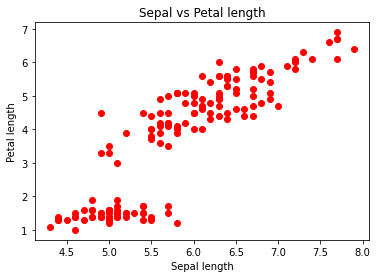

In [9]:
#plotting of sepal length and petal length
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c= 'red')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
#plot of comparison between sepal length and petal length
plt.title('Sepal vs Petal length')
plt.show()

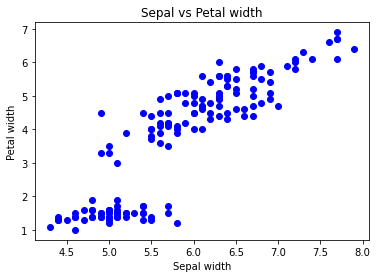

In [10]:
#plotting of sepal width and petal width
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c= 'blue')
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
#plot of comparison between sepal width and petal width
plt.title('Sepal vs Petal width')
plt.show()

<AxesSubplot:>

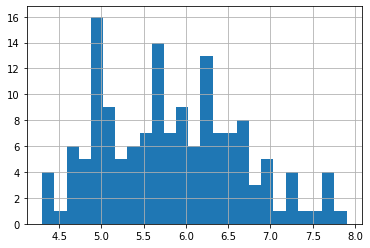

In [11]:
#plotting the histogram 
#histogram displays numerical data by grouping data into "bins" of equal width.
df['sepal length (cm)'].hist(bins=25)

<AxesSubplot:>

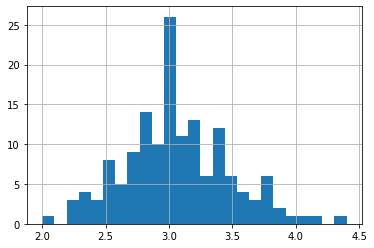

In [12]:
df['sepal width (cm)'].hist(bins=25)

<AxesSubplot:>

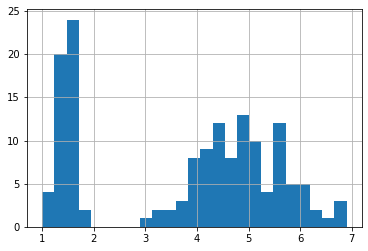

In [13]:
df['petal length (cm)'].hist(bins=25)

<AxesSubplot:>

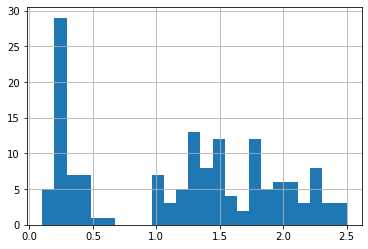

In [14]:
df['petal width (cm)'].hist(bins=25)

In [15]:
#this function enables us to select a particular cell of the dataset
#it helps us to select a value that belongs to a particular row or coloumn
x = df.iloc[:, :].values

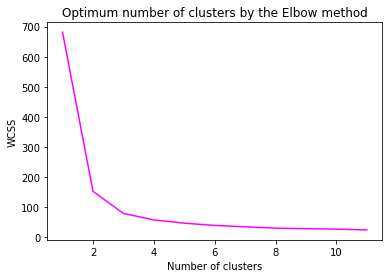

In [16]:
#Elbow method: WCSS( within-cluster sum of square) is the sum of squared distance between each point and the centroid in a cluster.
# When we plot the WCSS with the K value, the plot looks like an elbow.
# As the number of clusters increases, the WCSS value will start to decrease.
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,12):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot( range(1,12), wcss, c='magenta')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Optimum number of clusters by the Elbow method')
plt.show()

In [17]:
kmeans= KMeans( n_clusters= 3, random_state=42)
predicted_y= kmeans.fit_predict(x)

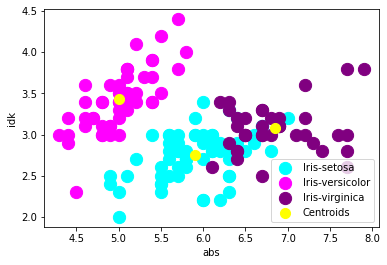

In [18]:
#visualizing the clusters
plt.scatter(x[predicted_y==0 ,0], x[predicted_y==0 ,1], s= 150, c='Aqua', label='Iris-setosa')
plt.scatter(x[predicted_y==1 ,0], x[predicted_y==1 ,1], s= 150, c='Magenta', label='Iris-versicolor')
plt.scatter(x[predicted_y==2 ,0], x[predicted_y==2 ,1], s= 150, c='purple', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 102, c = 'yellow', label = 'Centroids')
plt.xlabel('abs')
plt.ylabel('idk')
plt.legend()